## Premise

- We operate a store in a shopping mall.
- We want to decide on marketing strategies for the store
- We have customers data which have been clustered using an algorithm into 5 labels from 0 to 4

### Importing Libraries

In [98]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

%matplotlib inline

### Data Loading

In [146]:
df = pd.read_csv('./data/Mall Customers.csv', index_col=0)

#shortened the features name
cols = ['id', 'gender', 'age', 'ann_income', 'spend_score', 'label']
df.columns = cols

# df['label'] = df['label'].replace(dict(zip(range(5), string.ascii_uppercase[:5])))
df['label'] = df['label'].astype('category')
df.head()

,id,gender,age,ann_income,spend_score,label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


The feature `label` is our clusters of customers

In [147]:
df.shape

(200, 6)

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           200 non-null    int64   
 1   gender       200 non-null    object  
 2   age          200 non-null    int64   
 3   ann_income   200 non-null    int64   
 4   spend_score  200 non-null    int64   
 5   label        200 non-null    category
dtypes: category(1), int64(4), object(1)
memory usage: 9.8+ KB


No null values! Great! No need for data cleaning

### Data Exploration

Customers' Distribution

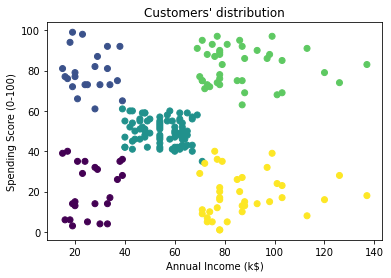

In [155]:
# plt.figure(figsize=(14, 10))
plt.scatter(df['ann_income'], df['spend_score'], c=pd.factorize(df['label'])[0])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (0-100)')
plt.title("Customers' distribution")
plt.show()

Total customers' segmentation

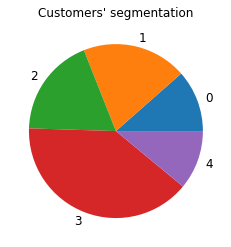

In [159]:
# plt.figure(figsize=(14, 10))
df.groupby(by='label')['id'].count().plot(kind='pie', fontsize=12)
plt.ylabel('')
plt.title("Customers' segmentation")
plt.show()

Distribution of customers' age

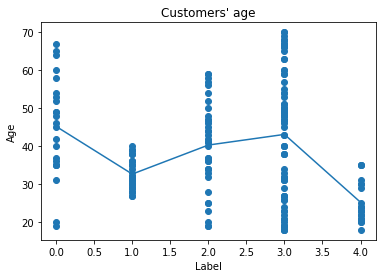

In [ ]:
# plt.figure(figsize=(14, 10))
plt.scatter(df['label'], df['age'])
plt.plot(df.groupby(by='label')['age'].mean())
plt.xlabel('Label')
plt.ylabel('Age')
plt.title("Customers' age")
plt.show()

Customers' gender

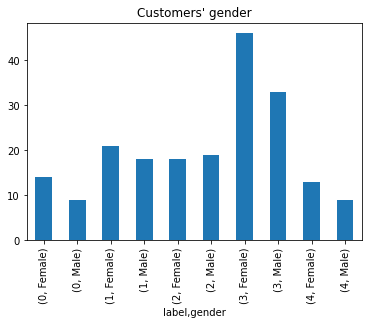

In [164]:
# plt.figure(figsize=(14, 10))
df.groupby(by=['label', 'gender'])['id'].count().plot(kind='bar')
plt.title("Customers' gender")
plt.show()

Focus on the majority of customer which are in label 1, 2, and 3 with a focus on 3

- Label 0
  - 29 customers
  - age around 45
  - low income
  - low spending
  - Strategi:
    - giveaway

- Label 1
  - 40 customers
  - age around 33
  - high income
  - high spending
  - Strategi:
    - premium product limited edition

- Label 2
  - 40 customers
  - age around 40
  - high income
  - low spending
  - Strategi:
    - discount

- Label 3
  - 80 customers
  - age around 40
  - mid income
  - mid spending
  - Strategi:
    - discount
    - affiliate discount

- Label 4
  - 20 customers
  - age around 25
  - low income
  - high spending
  - Strategi:
    - flash sale
    - giveaway